# Comparative Analysis of Machine Learning and Deep Learning Models in Football Player Valuation
              Author: Sandor Daniel Varsanyi
              Module: CAPB352 Business Data Analytics_Project (CNS)
              Date: 19/12/2025




```
# Ez kódként van formázva
```


# **Introduction**

This Jupyter Notebook discusses the practical part of the project named as ***Comparative Analysis of Machine Learning and Deep Learning Models in Football Player Valuation***. The objective of the notebook is to present the data preparation, explorative data analysis (EDA), and the implementation of classical machine learning and deep learning for predicting football player's transfer market value.

The main focus of the project is the comparison of  model performane based on real football statistics. Several individual and team statistics will be used to train the models (including standard, shooting, goalkeeping, passing, defensive actions, and miscallenaoeus stats). The target value is the estimated value of football player (market value).

The following models will be implemented and evaluated:

* Linear regression
* Random Forest
* XGBoost
* Multi-Layer-Perceptron (MLP)








# **Creating the final table - player_market_value_final_20-25**

From the files which can be found on github only the ***market_value*** folder contained data on transfer market values separately based on 5 different seasons. Therefore it was essential to unify the files together. Due to the fact that these files were made by myself, and I created the final structure of the files, the merging is needed only.



In [2]:
# import pandas
import pandas as pd

# define raw file urls
file_urls = [
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%201.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%202.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%203.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%204.csv",
    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/season%205.csv"
]

dfs = [pd.read_csv(url) for url in file_urls]

In [3]:
# Merge files
combined = pd.concat(dfs, ignore_index=True)

In [4]:
# See the shape of the dataframe.
combined.shape

(102776, 5)

In [13]:
# See the head of the dataframe
combined.head()

,market_value_id,player_id,team_id,season_id,player_market_value
0,1,6,PL_BUR_21,1,1066667
1,3,4305,PL_CRY_7,1,7166667
2,8,2325,PL_LIV_12,1,2666667
3,9,2325,PL_LIV_12,1,2666667
4,10,2325,PL_LIV_12,1,2666667


In [14]:
# Create a downloadable CSV
combined.to_csv("player_market_value_final_20-25.csv", index=False)

In [16]:
# Read the merged player_market_value fiel into a dataframe
market_value_url = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/player_market_value_final_20-25.csv"

df_market_value = pd.read_csv(market_value_url)

In [17]:
# Check whether the head is the same
df_market_value. head()

,market_value_id,player_id,team_id,season_id,player_market_value
0,1,6,PL_BUR_21,1,1066667
1,3,4305,PL_CRY_7,1,7166667
2,8,2325,PL_LIV_12,1,2666667
3,9,2325,PL_LIV_12,1,2666667
4,10,2325,PL_LIV_12,1,2666667


In [19]:
# Check the shape of the dataframe
df_market_value.shape

# Note: the shape is to same, therefore we can move with creating defining the urls and create the dataframes:

(102776, 5)

## **Defining Url variables**

The url variables were defined based on tables names. In the following step the separate dataframes will be created, and a general EDA will be carried out on them.

In [62]:
# Urls of connection tables and market value tables

team_table_url_1 =   "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/Teams_table.csv"

league_table_url_2 =  "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/league_table.csv"

season_table_url_3 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/Season_table.csv"

nation_table_url_4 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/Nation_table_final.csv"

player_table_url_5 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/meta_data/player_table_final.csv"

market_value_url_6 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/market_value/player_market_value_final_20-25.csv"


In [51]:
# Urls of Squad Statistics tables

squad_standard_url_7 =    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_StandardStats_2020-2025.csv"

squad_goalkeeping_url_8 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_Goalkeeping_Stats_final_2020-2025.csv"

squad_misc_url_9 =        "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_Misc_Stats_final_20-25.csv"

squad_passing_url_10 =    "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_PassingStats_final_20-25.csv"

squad_defensive_actions_url_11 = "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_DefensiveActions_Stats_final_2020-2025.csv"

squad_shooting_url_12 =   "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/squad_stats/Squad_ShootingStats_final_20-25.csv"

In [52]:
# Urls of Player Statistics tables

player_standard_url_13 =           "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Standard_Stats_final_20-25.csv"

player_goalkeeping_url_14 =        "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Goalkeeping_Stats_final_20-25.csv"

player_misc_url_15 =               "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Misc_Stats_final_20-25.csv"

player_passing_url_16 =            "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Passing_Stats_final_20-25.csv"

player_defensive_actions_url_17 =  "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_DefensiveActions_Stats_final_20-25.csv"

player_shooting_url_18 =           "https://raw.githubusercontent.com/sanyi1998/Sandor_Varsanyi_CAPB352_BDA_Project_2025/refs/heads/main/football_dataset_csv/player_stats/Player_Shooting_stats_20-25.csv"

## **Create separate Dataframes**



In [53]:
# Creating dataframes for metadata and market value tables

df_team = pd.read_csv(team_table_url_1, sep = ';')
df_league = pd.read_csv(league_table_url_2, sep =";")
df_season = pd.read_csv(season_table_url_3 , sep =';')
df_nation = pd.read_csv(nation_table_url_4)
df_player = pd.read_csv(player_table_url_5)
df_market_value = pd.read_csv(market_value_url_6)



# Creating dataframes for squad statistics

df_squad_standard = pd.read_csv(squad_standard_url_7, sep =";")
df_squad_goalkeeping = pd.read_csv(squad_goalkeeping_url_8)
df_squad_misc = pd.read_csv(squad_misc_url_9)
df_squad_passing = pd.read_csv(squad_passing_url_10)
df_squad_defact = pd.read_csv(squad_defensive_actions_url_11)


# Creating dataframes for player statistics

df_player_standard = pd.read_csv(player_standard_url_13)
df_player_goalkeeping = pd.read_csv(player_goalkeeping_url_14)
df_player_misc = pd.read_csv(player_misc_url_15)
df_player_passing = pd.read_csv(player_passing_url_16)
df_player_defact = pd.read_csv(player_defensive_actions_url_17)
df_player_shooting = pd.read_csv(player_shooting_url_18)

# **EDA (Exploratory Data Analysis) of separate tables**


In this section,  a general EDA will be carried out on separate tables to understand what kind of data does the tables, what is the meaning of the data and identify the errors and missing values that might contain.

Before starting the EDA process, it is important to mention that data was oragnized and cleaned in Power BI earlier to create consistent structure of tables. Moreover, the ID-s which will facilitate the merge of tables were added as well. However, there might be errors,  missing values or inconsistencies to capture.

A description of attributes will be added here as well, to understand the meaning of each attribute.


A deeper analysis will be carried out on dataframes which are containing actuals statistics including all player, squad and market value dataframes:

General checking for tables:

* df.head ()
* df.info ()
* df.describe ()
* df.isna().sum()


## **Team - df_team**

In [54]:
# See the head
df_team.head()

,team_id,team_name,league_id
0,BL_ARM_1,Arminia,BL_1
1,BL_AUG_2,Augsburg,BL_1
2,BL_BAY_3,Bayern Munich,BL_1
3,BL_BVB_4,Dortmund,BL_1
4,BL_FRA_5,Eint Frankfurt,BL_1


#### Team - Column names

The `df_team` dataframe contains three columns which can be described as the following:

* **team_id** = *This is the primary identifier of a team.*
* **team_name** = *The name of the football team.*
* **league_id** =  *This is the primary identifier of the league, where the team is playing.*



In [55]:
# See information about the df_team
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team_id    132 non-null    object
 1   team_name  132 non-null    object
 2   league_id  132 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


The dataframe contains object type values, and there is 132 values is each column, there are no missing values. Based on this missing values will not be checked.


In [56]:
df_team.describe()

,team_id,team_name,league_id
count,132,132,132
unique,132,132,5
top,BL_ARM_1,Arminia,SA_1
freq,1,1,28


It can be seen that there are 132 unique values in the team_id and team_name column and 5 in the league_id one.

## **League - df_league**

In [57]:
# See the head

df_league.head()

,league_id,league_name,league_country
0,BL_1,Bundesliga,Germany
1,LL_1,LaLiga,Spain
2,SA_1,Serie A,Italy
3,L1_1,Ligue1,France
4,PL_1,Premier League,England


### League - Column names

The `df_league` dataframe contains three columns which can be described as the following:

* **league_id** =  *This is the primary identifier of the league, where the team is playing.*
* **league_name** = *The name of the league where the football team is playing.*
* **league_country** = *This is the name of the country where the particular league is located.*



In [58]:
# See information about df_league
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   league_id       5 non-null      object
 1   league_name     5 non-null      object
 2   league_country  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


The dataframe contains object type values, and there 5 values is each column, there are no missing values. Based on this missing values will not be checked.

In [59]:
df_league.describe()

,league_id,league_name,league_country
count,5,5,5
unique,5,5,5
top,BL_1,Bundesliga,Germany
freq,1,1,1


It can be seen that there are 5 unqiue values in each columns and they appear only once in each.

## **Season - df_season**

In [65]:
#See the head

df_season.head()

,season_id,season_name,season_start,season_end
0,1,2020-2021,2020,2021
1,2,2021-2022,2021,2022
2,3,2022-20223,2022,2023
3,4,2023-2024,2023,2024
4,5,2024-2025,2024,2025


It can be seen that there is a typo here, so we will replace it.

In [70]:
# replace mistyped value
df_season["season_name"] = df_season["season_name"].replace ("2022-20223", "2022-2023")

df_season.head()

,season_id,season_name,season_start,season_end
0,1,2020-2021,2020,2021
1,2,2021-2022,2021,2022
2,3,2022-2023,2022,2023
3,4,2023-2024,2023,2024
4,5,2024-2025,2024,2025


### Season - Column names

The `df_season` dataframe contains three columns which can be described as the following:

* **season_id** = *The unique identifier of the season, used to reference a specific season.*
* **season_name** = *The name of the season (e.g."2020-2021") describing the league year.*
* **season_start** = *The official start year of the season.*
* **season_end** = *The official end year of the season.*


In [72]:
# See the info
df_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season_id     5 non-null      int64 
 1   season_name   5 non-null      object
 2   season_start  5 non-null      int64 
 3   season_end    5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


The dataframe contains object and integer type values, and there 5 values in each column, there are no missing values. Based on this missing values will not be checked.

In [74]:
df_season.describe()

,season_id,season_start,season_end
count,5.000000,5.000000,5.000000
mean,3.000000,2022.000000,2023.000000
std,1.581139,1.581139,1.581139
min,1.000000,2020.000000,2021.000000
25%,2.000000,2021.000000,2022.000000
50%,3.000000,2022.000000,2023.000000
75%,4.000000,2023.000000,2024.000000
max,5.000000,2024.000000,2025.000000


## **Nation - df_nation**

In [75]:
#See the head
df_nation.head()

,nation_id,nation_name
0,1,al ALB
1,2,am ARM
2,3,ao ANG
3,4,ar ARG
4,5,at AUT


### Nation - Column names

Only two columns are in this dataframe:

* **nation_id** = *A unique identifier referencing the player’s nationality.*
* **nation_name** = *This the name of the nation, which is a combinatipn of a two character lower case format and a 3 character long upper case format.*

In [77]:
df_nation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nation_id    128 non-null    int64 
 1   nation_name  128 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


There are no missing values and there is a combintion of integers and object types.

In [78]:
df_nation. describe()

,nation_id
count,128.000000
mean,64.500000
std,37.094474
min,1.000000
25%,32.750000
50%,64.500000
75%,96.250000
max,128.000000


## **Player - df_player**



In [79]:
# See the head of df_player
df_player.head()

,player_id,player_name,position,nation_id,born
0,1,Aaron Ciammaglichella,MF,63.0,2005.0
1,2,Aaron Connolly,FW,58.0,2000.0
2,2,Aaron Connolly,"FW,MF",58.0,2000.0
3,3,Aaron Cresswell,DF,37.0,1989.0
4,3,Aaron Cresswell,"DF,FW",37.0,1989.0


### Player - Column names

5 columns can be seen in this dataframe, which can be described as:

* **player_id** = A unique identifier assigned to each player.
* **player_name** = The full name of the player.
* **position** = The player’s on-field playing role ( GK = Goalkeeper, MF = midfielder, DF = defender, FW = forward).
* **nation_id** = A unique identifier referencing the player’s nationality.
* **born** = The player’s date of birth.


There are other factors which could be identified and will be checked. It seems **`position`** is in an `object` type format and in some places contains, two characters. This need to be encoded for machine learning tasks.

On the other hand **`nation_id`** and **`born`** seems as a `float` type values. **`nation_id`** might be converted into integer, to be able to merge it correctly with nation table.



In [80]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    7635 non-null   int64  
 1   player_name  7635 non-null   object 
 2   position     7635 non-null   object 
 3   nation_id    7630 non-null   float64
 4   born         7633 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 298.4+ KB


Based on the information **7635** should be in each column, however it can be seen that **`born`** table contains **7633** non-null values and ** `nation_id`** contains **7630** non null values. Moreover, as it was predicted these two columns are in `float64` type format, which needs to be converted into `integer`

#### df_player_ missing values

In [81]:
# Check out the missing values

df_player[df_player.isna().any(axis=1)]

,player_id,player_name,position,nation_id,born
3375,2461,Jeremy Ngakia,DF,NaN,2000.0
4582,3352,Mahmut Kücüksahin,MF,NaN,2004.0
5685,4152,Olabade Aluko,DF,NaN,NaN
5851,4276,Pape Daouda Diongue,"MF,FW",111.0,NaN
6055,4425,Plamedi Nsingi,MF,NaN,2000.0
6766,4933,Sidnei Tavares,MF,NaN,2001.0


Due to the reason that I do not want to drop these values, I will expand them and assign `nation_id` = 5, which is AUT (Austria) to each player and `born` missing values will be filled with the means of the columns.

In [96]:
# Add missing values to the nation_id and born columns

# nation_id replaced missing value with 5

df_player["nation_id"] = df_player["nation_id"].fillna(5)

# born missing values replaced with the mean of the columns

df_player["born"] = df_player["born"].fillna(df_player["born"].mean())


#




In [86]:
# Check the columns
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    7635 non-null   int64  
 1   player_name  7635 non-null   object 
 2   position     7635 non-null   object 
 3   nation_id    7635 non-null   float64
 4   born         7635 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 298.4+ KB


Now it can be seen that the missing values were replaced success

#### df_player floats to integers

In [97]:
# Convert floats to integers

df_player["nation_id"] = df_player["nation_id"].astype(int)
df_player["born"] = df_player["born"].astype(int)

df_player.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7635 non-null   int64 
 1   player_name  7635 non-null   object
 2   position     7635 non-null   object
 3   nation_id    7635 non-null   int64 
 4   born         7635 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 298.4+ KB


In [98]:
# Checking nation_id

if df_player["nation_id"].dtype == "int64" or str(df_player["nation_id"].dtype).startswith("Int"):
  print(f"Conversion was successful. 'nation_id' is now {df_player["nation_id"].dtype}")

else:
  print ("Conversion failed")


Conversion was successful. 'nation_id' is now int64


In [99]:
# Checking born

if df_player["born"].dtype == "int64" or str(df_player["born"].dtype).startswith("Int"):
  print(f"Conversion was successful. 'born' is now {df_player["born"].dtype}")

else:
  print ("Conversion failed")


Conversion was successful. 'born' is now int64


The conversion was successul as well, the **`df_player`** contains, `int64` and `object` type values.

In [100]:
# To see the unique values in positions column
df_player['position'].unique()

array(['MF', 'FW', 'FW,MF', 'DF', 'DF,FW', 'GK', 'MF,FW', 'DF,MF',
       'MF,DF', 'FW,DF'], dtype=object)

#### df_player_encoding positions

To prepare the model for machine learning tasks position might be essential as it is suggested that an influential factor in determining player market data, Therefore it needs to be converted to integers.

Four positions is mentioned in the table:

* **GK** = Goalkeeper
* **DF** = Defender
* **MF** = Midfielder
* **FW** = Forward

When the head of the dataframe was examined, it could be seen that there were player where two position appeared as a value. This is a unique fact as these players are capable to play in multiple positions. It is supposed that this is a valuable asset of the player and an increasing factor in player market value. Therfore it needs to be decided whether to keep both positions or remove them and keep only the first one. From the task perspective it would be easier to keep only the main position, however this project aims to present the real world sceanrios, therefore keeping both positions and encode them would be essential.

However, it is decision to encode now or later, when the data will be merged. In my opinion, it will be better, if the the encoding part of this task would be in the EDA of the merged table.








### df_player_EDA

In [101]:
df_player.describe()

,player_id,nation_id,born
count,7635.000000,7635.000000,7635.000000
mean,2791.809299,50.336215,1997.115521
std,1605.071800,31.009282,5.107594
min,1.000000,1.000000,1977.000000
25%,1414.500000,30.000000,1994.000000
50%,2774.000000,38.000000,1998.000000
75%,4183.000000,63.000000,2001.000000
max,5597.000000,128.000000,2009.000000


From the description above it could be seen that player who will be examined were born between 1977 and 2009.

Also it can be seen that:

* 25% of the player were born before 1994.
* 50% = is the median value 1998.
* 75% of the players were born before 2001 one.




In [102]:
# See how on histogram how our data is distributed
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Distribution of birth year'}, xlabel='Birth year', ylabel='Frequency'>

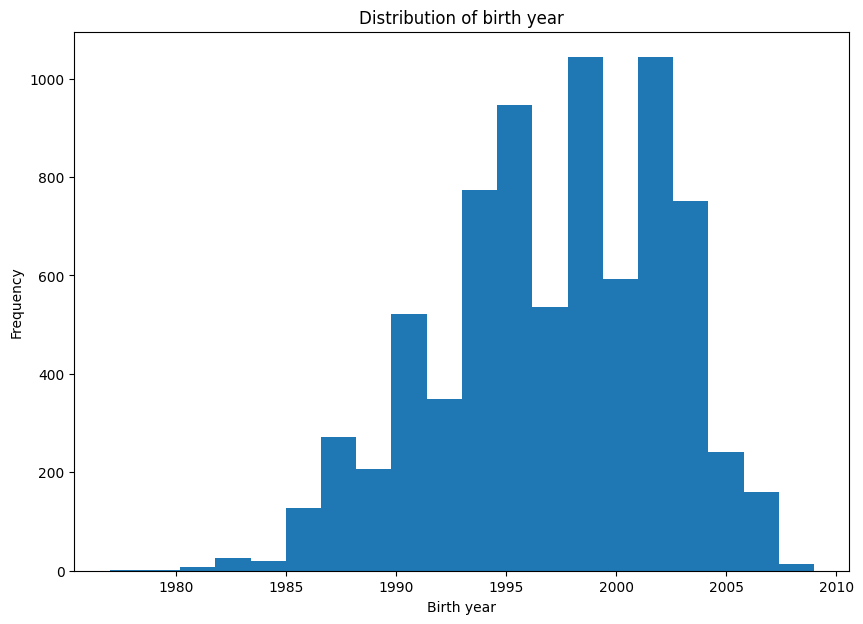

In [116]:
# create the histogram

df_player['born'].plot(kind='hist', bins=20, figsize=(10,7), title='Distribution of birth year', xlabel='Birth year', ylabel='Frequency')

#

<Axes: >

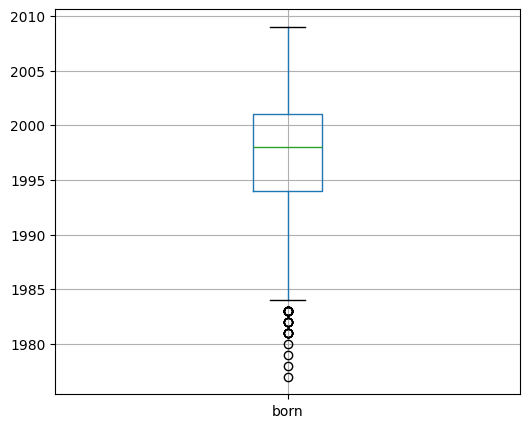

In [111]:
df_player.boxplot(column='born', figsize=(6,5))

From the grahs above, but especially from the boxplotit can be seen that, half of the players were born around 1997-1998.

The Quartiles are between 1994 (Q1) and 2001 (Q3)  which means that 50% of the player were born between this period.

The whiskers shows at the top that the youngest players in the dataset were born around 2009. At the bottom those players can be seen who were born before 1985.

## **Market Value - df_market_value**

In [117]:
df_market_value.head()

,market_value_id,player_id,team_id,season_id,player_market_value
0,1,6,PL_BUR_21,1,1066667
1,3,4305,PL_CRY_7,1,7166667
2,8,2325,PL_LIV_12,1,2666667
3,9,2325,PL_LIV_12,1,2666667
4,10,2325,PL_LIV_12,1,2666667
